In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
%matplotlib inline
sns.set_style("dark")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

In [108]:
# Loading the data
data = pd.read_csv('winemag-data-130k-v2.csv')

In [109]:
# General Info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
Unnamed: 0               129971 non-null int64
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(2), object(11)
memory usage: 13.9+ MB


In [110]:
def pastel_plot(data, x, y):
    plt.figure(figsize = (15,6))
    plt.title('Points histogram - whole dataset')
    sns.set_color_codes("pastel")
    sns.barplot(x = x, y=y, data=df)
    locs, labels = plt.xticks()
    plt.show()

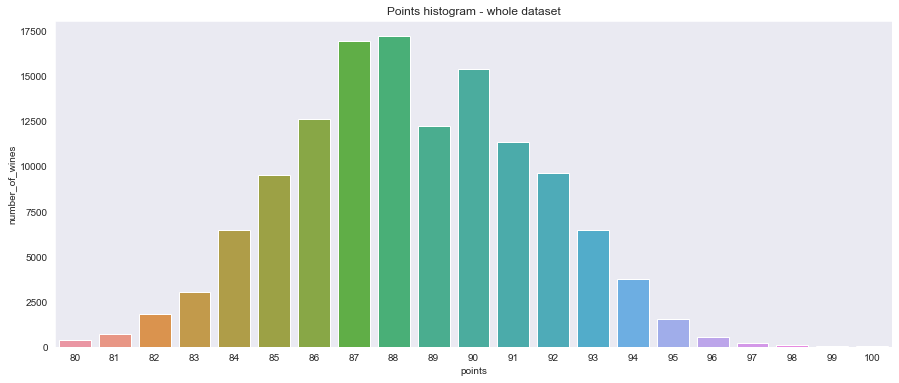

In [111]:
temp = data["points"].value_counts()
df = pd.DataFrame({'points': temp.index,
                   'number_of_wines': temp.values
                  })

pastel_plot(df,'points', 'number_of_wines')

In [112]:
z=data.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
z[['country','price']].head(n=10)

,country,price
38,Switzerland,85.285714
14,England,51.681159
17,Germany,42.257547
15,France,41.139120
19,Hungary,40.648276
22,Italy,39.663770
40,US,36.573464
7,Canada,35.712598
2,Australia,35.437663
21,Israel,31.768916


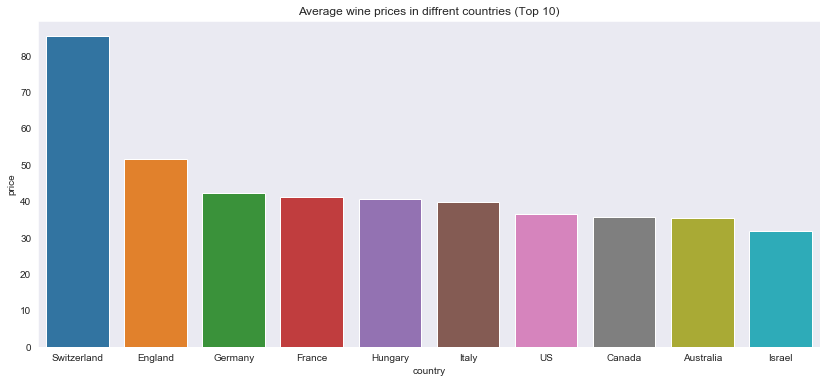

In [113]:
plt.figure(figsize = (14,6))
plt.title('Average wine prices in diffrent countries (Top 10)')
sns.barplot(x = 'country', y="price", data=z.head(10))
locs, labels = plt.xticks()
plt.show()

In [114]:
z=z.sort_values('points', ascending=False)
z[['country','points']].head(10)

,country,points
14,England,91.581081
20,India,90.222222
3,Austria,90.101345
17,Germany,89.851732
7,Canada,89.369650
19,Hungary,89.191781
9,China,89.000000
15,France,88.845109
24,Luxembourg,88.666667
2,Australia,88.580507


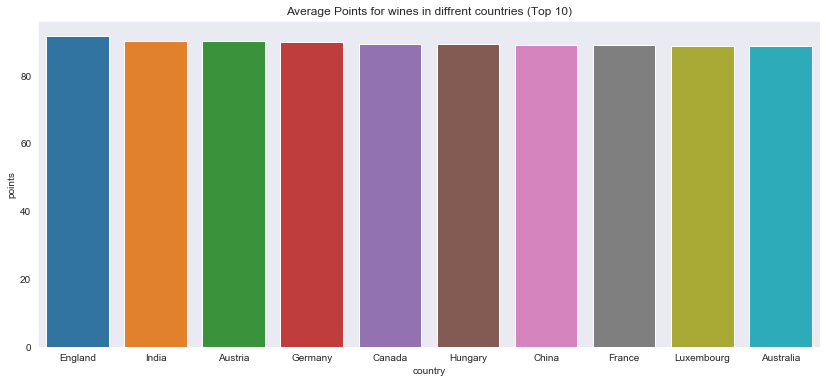

In [115]:
plt.figure(figsize = (14,6))
plt.title('Average Points for wines in diffrent countries (Top 10)')
sns.set_color_codes("pastel")
sns.barplot(x = 'country', y="points", data=z.head(10))
locs, labels = plt.xticks()
plt.show()

          province     points
351  Südburgenland  94.000000
202        Madeira  93.230769
223    Mittelrhein  92.000000
300    Puente Alto  91.733333
401         Wachau  91.620397
124        England  91.581081
324     Santa Cruz  91.500000
170        Kamptal  91.454768
370     Traisental  91.255814
117      Eisenberg  91.187500


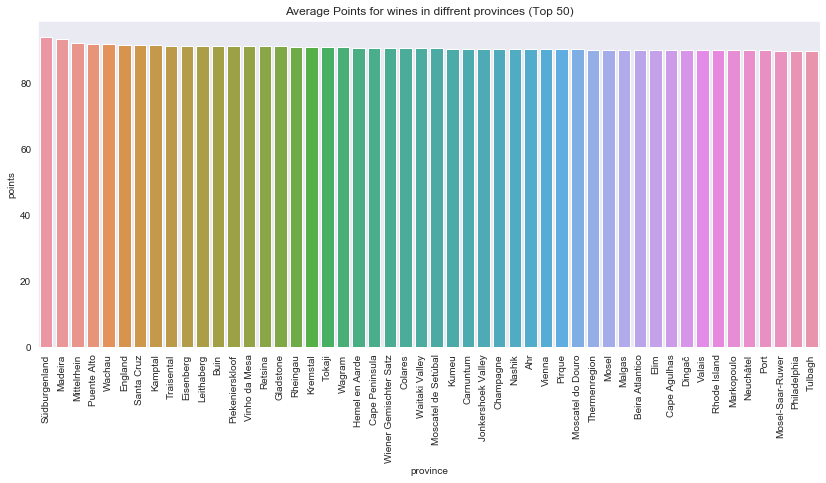

In [116]:
z=data.groupby(['province'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
z[['province','price']].head(n=10)

z=z.sort_values('points', ascending=False)
print(z[['province','points']].head(10))

plt.figure(figsize = (14,6))
plt.title('Average Points for wines in diffrent provinces (Top 50)')
sns.set_color_codes("pastel")
sns.barplot(x = 'province', y="points", data=z.head(50))
locs, labels = plt.xticks(rotation='vertical')
plt.show()

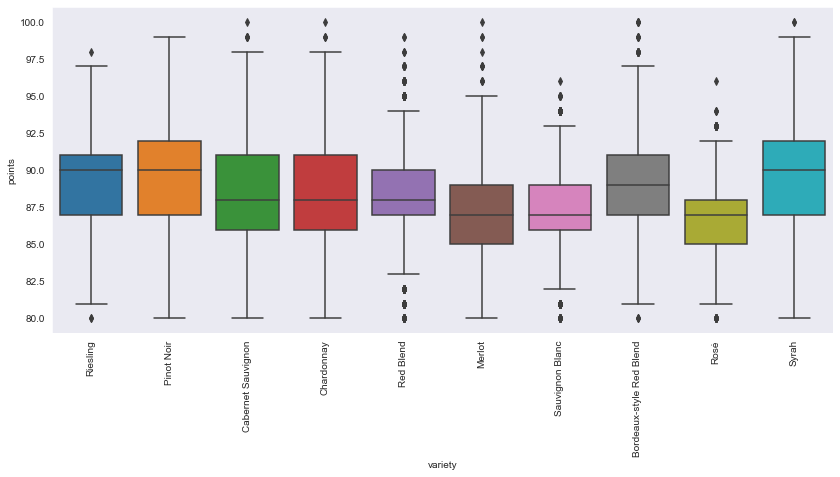

In [117]:
# Most frequently occuring wine variety and their points distribution
df1= data[data.variety.isin(data.variety.value_counts().sort_values(ascending=False).head(10).index)]
plt.figure(figsize = (14,6))
sns.boxplot(
    x = 'variety',
    y = 'points',
    data = df1,
)
plt.xticks(rotation='vertical')
plt.show()

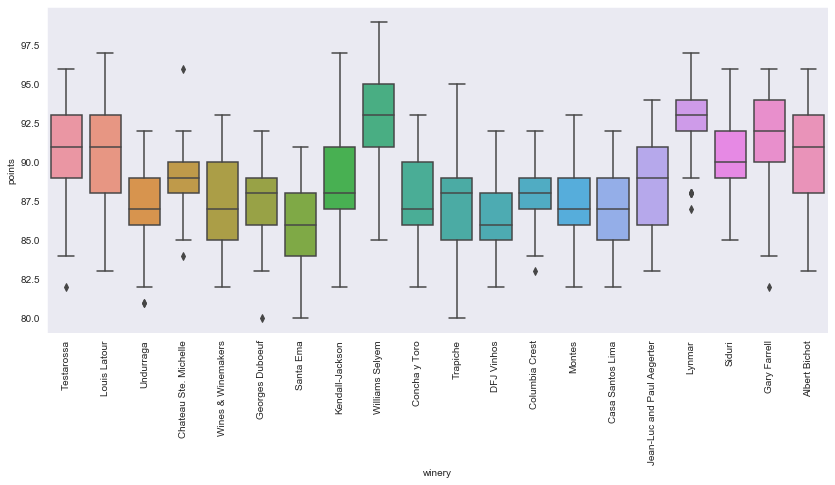

In [118]:
# Most frequently occuring wineries and their points distribution
df1= data[data.winery.isin(data.winery.value_counts().sort_values(ascending=False).head(20).index)]
plt.figure(figsize = (14,6))
sns.boxplot(
    x = 'winery',
    y = 'points',
    data = df1,
)
plt.xticks(rotation='vertical')
plt.show()

In [119]:
# Some NLP done which is used in plots later
data['description']= data['description'].str.lower()
data['description']= data['description'].apply(lambda elem: re.sub('[^a-zA-Z]',' ', elem))
def populate_description_cleaned(data):
    tokenizer = RegexpTokenizer(r'\w+')
    words_descriptions = data['description'].apply(tokenizer.tokenize)
    stopword_list = stopwords.words('english')
    ps = PorterStemmer()
    words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem if not word in stopword_list])
    # words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])
    data['description_lengths_cleaned']= [len(tokens) for tokens in words_descriptions]
    data['description_cleaned'] = words_descriptions.apply(lambda elem: ' '.join(elem))
        # Top 100 common words (after cleaning)
    all_words = [word for tokens in words_descriptions for word in tokens]
    VOCAB = sorted(list(set(all_words)))
    print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
    count_all_words = Counter(all_words)
    print(count_all_words.most_common(100))
populate_description_cleaned(data)

3262053 words total, with a vocabulary size of 21858
[('wine', 83107), ('flavor', 70969), ('fruit', 63935), ('aroma', 41052), ('finish', 40466), ('acid', 39812), ('palat', 38636), ('drink', 33970), ('cherri', 33590), ('tannin', 32981), ('ripe', 29143), ('black', 29054), ('dri', 26516), ('note', 25306), ('spice', 23546), ('rich', 22031), ('red', 22028), ('fresh', 21983), ('berri', 19342), ('show', 18569), ('oak', 18356), ('nose', 16980), ('plum', 16383), ('full', 16193), ('offer', 16150), ('textur', 15957), ('sweet', 15928), ('appl', 15359), ('balanc', 15126), ('blackberri', 15064), ('blend', 15039), ('bodi', 14759), ('age', 14287), ('soft', 14243), ('crisp', 13686), ('well', 13454), ('structur', 13115), ('white', 13081), ('light', 13053), ('dark', 12488), ('fruiti', 12035), ('citru', 11769), ('hint', 11390), ('bright', 11370), ('miner', 11300), ('give', 11146), ('herb', 11071), ('raspberri', 11065), ('vanilla', 11063), ('cabernet', 10965), ('touch', 10574), ('pepper', 10376), ('juici',

In [101]:
# Distribution of numeric columns
data.loc[:, data.columns != 'Unnamed: 0'].describe()

,points,price,description_lengths_cleaned
count,129971.000000,120975.000000,129971.000000
mean,88.447138,35.363389,25.098314
std,3.039730,41.022218,6.785457
min,80.000000,4.000000,2.000000
25%,86.000000,17.000000,20.000000
50%,88.000000,25.000000,25.000000
75%,91.000000,42.000000,29.000000
max,100.000000,3300.000000,79.000000


In [106]:
# Top 100 common words (after cleaning)
all_words = [word for tokens in words_descriptions for word in tokens]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
count_all_words = Counter(all_words)
count_all_words.most_common(100)

NameError: name 'words_descriptions' is not defined

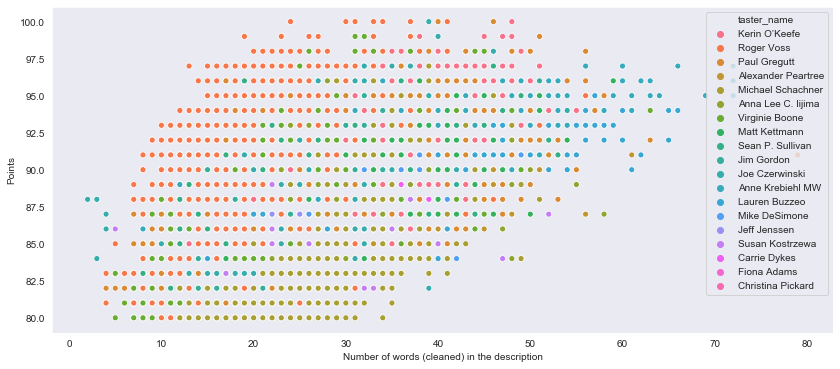

In [103]:
plt.figure(figsize = (14,6))
ax = sns.scatterplot(x='description_lengths_cleaned', y='points', hue='taster_name', data=data)
plt.xlabel('Number of words (cleaned) in the description')
plt.ylabel('Points')
plt.show()

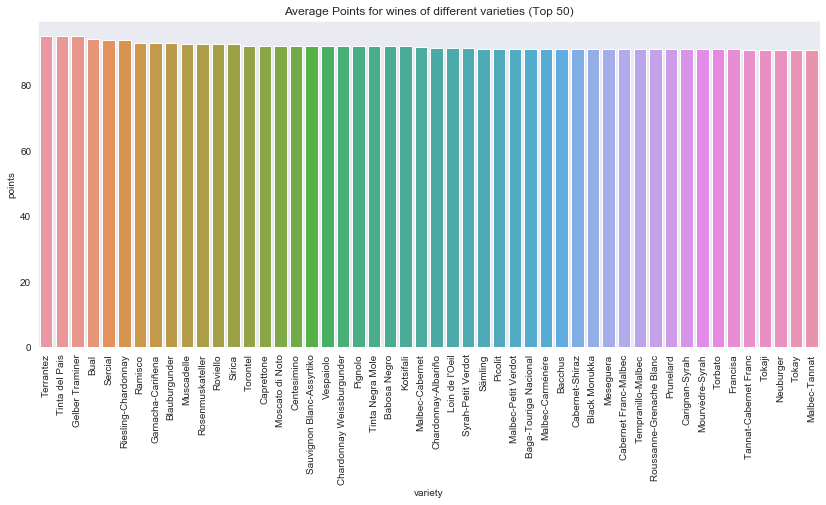

In [104]:
z=data.groupby(['variety'])['price','points'].mean().reset_index().sort_values('points',ascending=False)
z[['variety','points']].head(n=50)
plt.figure(figsize = (14,6))
plt.title('Average Points for wines of different varieties (Top 50)')
sns.set_color_codes("pastel")
sns.barplot(x = 'variety', y="points", data=z.head(50))
locs, labels = plt.xticks(rotation='vertical')
plt.show()

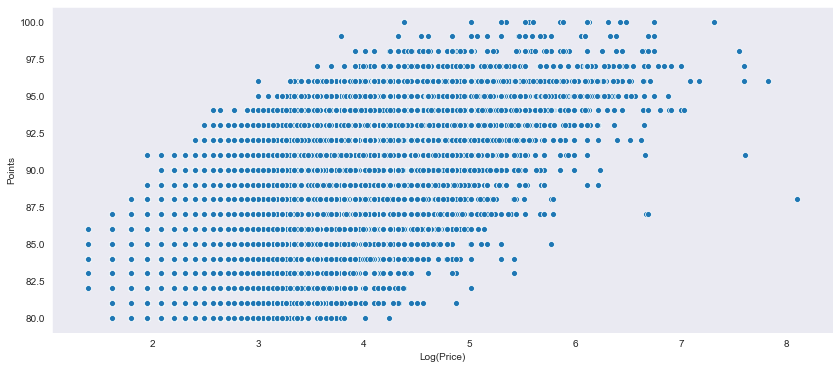

In [105]:
plt.figure(figsize = (14,6))
df_wine1 = data.copy()
df_wine1['price_log'] = np.log(df_wine1['price'])
ax = sns.scatterplot(x='price_log', y='points', data=df_wine1)
plt.xlabel('Log(Price)')
plt.ylabel('Points')
plt.show()